 # <span style='color :steelblue;font-size:35px' >Unsupervised Project</span> 

 # <span style='color :steelblue;font-size:25px' >PART-2</span>

### DOMAIN: Manufacturing 
- **CONTEXT:** Company X curates and packages wine across various vineyards spread throughout the country.
- **DATA DESCRIPTION:** The data concerns the chemical composition of the wine and its respective quality.
 **Attribute Information:** 
   1. A, B, C, D: specific chemical composition measure of the wine
   2. Quality: quality of wine [ Low and High ]
- **PROJECT OBJECTIVE:** Goal is to build a synthetic data generation model using the existing data provided by the company.
   1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

## 1. Import and warehouse data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes = True)

import warnings as wn
wn.filterwarnings('ignore')

### Load dataset

In [2]:
manuf_data_df = pd.read_excel('Part2 - Company.xlsx')

In [3]:
print('Shape of manuf_data_df:', manuf_data_df.shape)
manuf_data_df.head()

Shape of manuf_data_df: (61, 5)


,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


- **There are 61 rows and 5 columns present in dataset.**
- **From data it looks like some missing / null value present in Quality(target column).**

## Null Value check

In [4]:
#check if any null is value is there
manuf_data_df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

- **There is 18 missing value in Quality (which is target clumn).**

## Check the distribution of the data

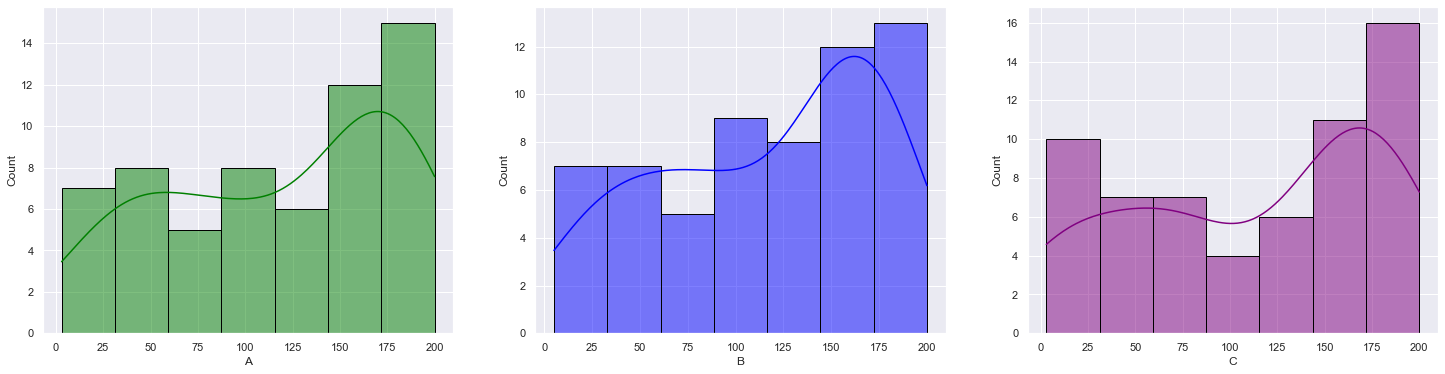

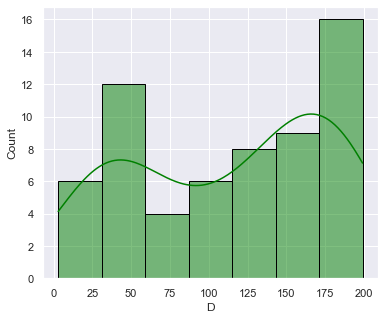

In [5]:
#distribution for the continuous variable
plt.figure(figsize=(25,6))

#distribution of tenure
plt.subplot(1,3,1)
sns.histplot(manuf_data_df.A, kde= True, color='green', edgecolor = 'black');

#distribution of TotalCharges
plt.subplot(1,3,2)
sns.histplot(manuf_data_df.B, kde= True, color='blue', edgecolor = 'black');

#distribution of MonthlyCharges
plt.subplot(1,3,3)
sns.histplot(manuf_data_df.C, kde= True, color='purple', edgecolor = 'black');

#distribution for the continuous variable
plt.figure(figsize=(6,5))

#distribution of tenure
plt.subplot(1,1,1)
sns.histplot(manuf_data_df.D, kde= True, color='green', edgecolor = 'black');

- From data it looks like all data followed similar range.
- Most of data distributed in similar way with little variance.

Quality A    26
Quality B    17
Name: Quality, dtype: int64


<AxesSubplot:>

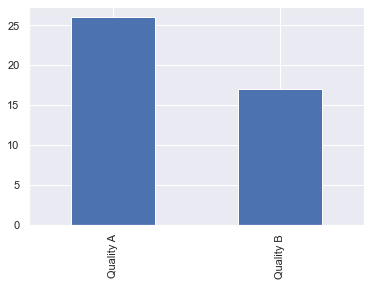

In [6]:
#Distribution of the Quality column
print(manuf_data_df['Quality'].value_counts())
manuf_data_df['Quality'].value_counts().plot(kind='bar')

- Since there are 18 null entery in Quality column, the distribution showing less data point in each category.

## Check if any outliers

In [7]:
#Box plot to check if any outliers in data
#define one fucniton to do box plot
def box_plot(data, columnlist):
    dataset = data
    column_list = columnlist
    length_columnlist = len(columnlist)
    
    #plot colors
    colors_list = ['lightgreen', 'lightblue', 'pink']
    
    if(length_columnlist > 3):
        length_columnlist = 3
    
    #plot the graph
    plt.figure(figsize=(15, 10))
    for i in range(length_columnlist):
        plt.subplot(3, 3, i+1)
        sns.boxplot(data= dataset, x=column_list[i], color = colors_list[i] )

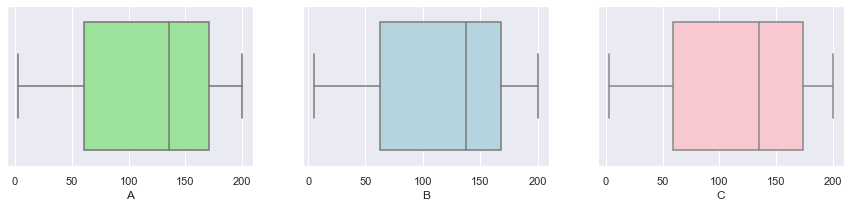

In [8]:
#box plot
box_plot(manuf_data_df, ['A', 'B', 'C'])

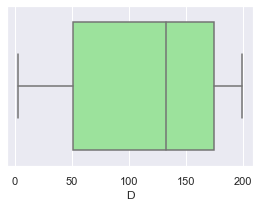

In [9]:
#box plot
box_plot(manuf_data_df, ['D'])

- **From boxplot, it indicates there is no outliers in data.**

### Multivariant analysis

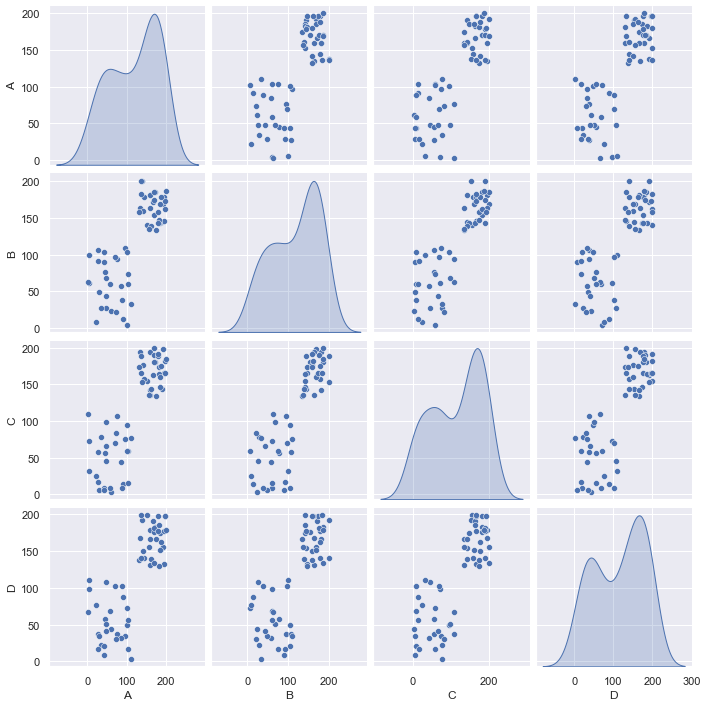

In [10]:
#pair plot
sns.pairplot(manuf_data_df, diag_kind='kde')

- **From diagonal it looks like most of data distributed in two gussians.**

## Our Goal is to build a synthetic data generation model using the existing data provided by the company.

### Split the data set into dependant and Independent variable

In [11]:
#separate dependant and independent variable
X = manuf_data_df.drop('Quality', axis = 1)
y = manuf_data_df['Quality']

- **"Quality" is our target variable and rest are independent variable.**


### Apply Feature Scaling

In [12]:
from scipy.stats import zscore
X_scaled = X.apply(zscore)

- **As we saw the data have different sacales. So standard scaller applied to make all data in same same scale.**

### Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

## K-Mean Clustering

- Check with different K value to find the best no.of clusters.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

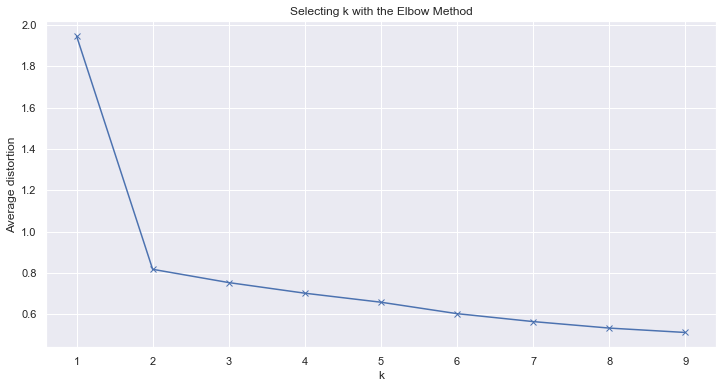

In [13]:
#Find the optimal no.of cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_scaled)
    prediction=model.predict(X_scaled)
    meanDistortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])


#plot Elbow graph    
plt.figure(figsize=(12,6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

- **From Elbow graph it looks like there are group of two clusers present in data set.**

### Check the WCSS score

In [14]:
#check within cluster sum of squre(WCSS) score.
wcss= []
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state=1)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    
#print WCSS score
wcss

[244.00000000000006,
 45.52255176619497,
 38.079632514129,
 33.3761547421165,
 28.677860179747356,
 24.916509291173394,
 22.042599581687906,
 19.29142499140996,
 17.589131340541037,
 16.209245603094722]

- **From WCSS it looks after 45.52 the decrease in wcss value is minimal. So we can chose 2 cluser is for better classification for data**

### Check the silhoutteScore

In [15]:
# check the shilhoutte score
from sklearn.metrics import silhouette_score, silhouette_samples
silhoutteScore = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state=1)
    km.fit(X_scaled)
    silhoutteScore.append(silhouette_score(X_scaled, km.labels_))
    
#silhoutte score
silhoutteScore

[0.6891674125195145,
 0.4950584223752009,
 0.4850487671825569,
 0.22520660233064826,
 0.2388204160587547,
 0.24849011210416888,
 0.25570096669833103,
 0.2523227100775014,
 0.260465123882134]

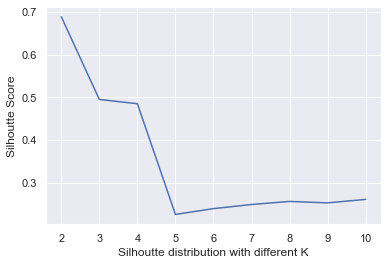

In [16]:
#plot silhoutte score
plt.xlabel('k')
plt.ylabel('Silhoutte Score')
plt.xlabel('Silhoutte distribution with different K')
plt.plot(range(2,11), silhoutteScore)

- **SilhoutteScore also high for two cluster.**

## Hierarchical clustering to find out the optimal number of clusters in the data

In [17]:
#import libraries
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

In [18]:
#using Average linkage
link_method = linkage(X_scaled, metric='euclidean', method= 'average')

In [19]:
c, coph_dists = cophenet(link_method , pdist(X_scaled))
print("Cophenete correlation:", c)

Cophenete correlation: 0.9455524381136698


- **As we can see the cophenete correlation value it nearly 95%. Closer two one means the data are properly separated based on the similarty.**

### Dendogram to check the visual representation of data

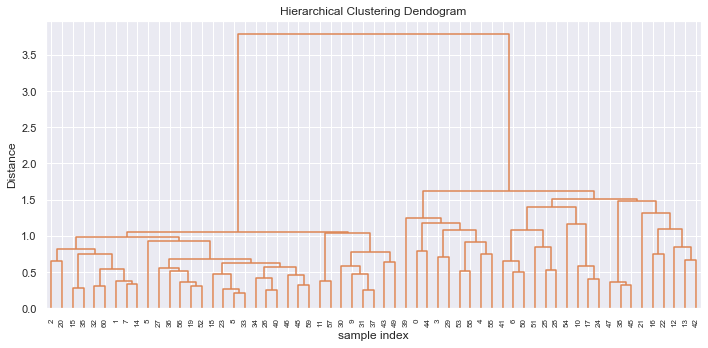

In [20]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link_method, 
           leaf_rotation=90.,
           color_threshold = 40, 
           leaf_font_size=8.
          )
plt.tight_layout()

- **As we can see from dendogram the data is properly divided into two clusters.**

In [21]:
#AgglomerativeClustering clustering with 2 cluser
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
clusters=agg.fit_predict(X_scaled)

manuf_data_df['Agg_label'] = agg.labels_

In [22]:
manuf_data_df.head()

,A,B,C,D,Quality,Agg_label
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0


### Note:
- From both K-Mean and Hierarchical clustering we obsered data point distributed into two clusters.
- So we ll consider 2 is the best no.of clusters the label the data.

### K-Mean with 2 clusters

In [23]:
# Let us first start with K = 2
final_model=KMeans(2, random_state = 1)
final_model.fit(X_scaled)
prediction=final_model.predict(X_scaled)

centroids = final_model.cluster_centers_
centroids

array([[-0.97623853, -0.97020968, -0.98857712, -0.98138597],
       [ 0.8283236 ,  0.82320821,  0.83879271,  0.83269113]])

- **As we can observed from the centroied of both the clusers are well separables for each variables between two clusters.**

### Append the preidtion label got from clustering in original data set

In [24]:
#Append the prediction 
manuf_data_df['group'] = prediction
print("Groups Assigned : \n")
manuf_data_df.head()

Groups Assigned : 



,A,B,C,D,Quality,Agg_label,group
0,47,27,45,108,Quality A,0,0
1,174,133,134,166,Quality B,1,1
2,159,163,135,131,NaN,1,1
3,61,23,3,44,Quality A,0,0
4,59,60,9,68,Quality A,0,0


- **We can observed form the cluster label, all "Quality A" wine are part of cluster_0 and "Quality B" wines are part of cluster_1.**

1    33
0    28
Name: group, dtype: int64


<AxesSubplot:>

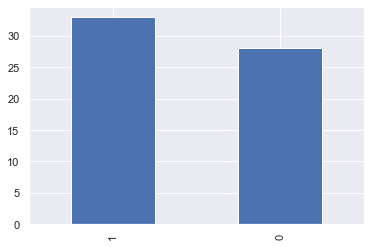

In [25]:
#Count of data points in each cluster
print(manuf_data_df.group.value_counts())
manuf_data_df.group.value_counts().plot(kind='bar')

- Cluster_0 have 28 data points.
- Cluster_1 have 33 data points.

In [26]:
#cluster_0 data
manuf_data_df[manuf_data_df['group'] == 0]

,A,B,C,D,Quality,Agg_label,group
0,47,27,45,108,Quality A,0,0
3,61,23,3,44,Quality A,0,0
4,59,60,9,68,Quality A,0,0
6,34,28,78,22,Quality A,0,0
10,76,94,107,37,Quality A,0,0
12,27,106,57,37,Quality A,0,0
13,45,76,56,57,Quality A,0,0
16,4,61,72,98,Quality A,0,0
17,96,109,75,34,Quality A,0,0
21,5,100,32,110,Quality A,0,0


- As we can see the chemical combination range for non null target column for wine quality A most are below 100. Also observed the null target data the cluster classified the data properly. 
- So for cluster zero theose rows with target null can be filled with Quality A.

In [27]:
## Cluster One
manuf_data_df[manuf_data_df['group'] == 1]

,A,B,C,D,Quality,Agg_label,group
1,174,133,134,166,Quality B,1,1
2,159,163,135,131,NaN,1,1
5,153,140,154,199,NaN,1,1
7,191,144,143,154,NaN,1,1
8,160,181,194,178,Quality B,1,1
9,145,178,158,141,NaN,1,1
11,138,200,153,192,Quality B,1,1
14,186,142,146,174,NaN,1,1
15,196,145,166,132,Quality B,1,1
18,167,171,163,191,NaN,1,1


- As we can see the chemical combination range for non null target column for wine quality B, most are above 100. Also observed the null target data cluster classified the data properly. 
- So for cluster One, theose rows with target null can be filled with Quality B.

### Note:
- **As we observed both hierachical and K-Mean clustering grouping the data points exactly same. so i ll be dropping one cluser label.**

In [28]:
#drop Agg_label label
manuf_data_df.drop('Agg_label', axis = 1, inplace= True)

### Take backup of original data

In [29]:
#take one copy of the manuf_data_df
manuf_data_df_bk = manuf_data_df.copy()

# #drop the null value 
manuf_data_df = manuf_data_df.dropna()

## Replace Target column with numeric value

In [30]:
## Covert Quality into numeric
label_encoding = {"Quality": {
                    "Quality A": 0,
                    "Quality B": 1
                    }  
                 }

for column, val_mapping in label_encoding.items():
    manuf_data_df[column] = manuf_data_df[column].apply(lambda i: val_mapping[i])

- "Quality A" replaced with 0 and "Quality B" replace with 1, for check the quality column and the cluster goup similarity are statistically significat or not.

### Chi Square test:
- check quality and grop variable are having similarity data or not.

In [31]:
#Import the scientific package (scipy and chi2_contingency)
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None     #P-Value
        self.chi2 = None  #Chi Test Statistic
        self.dof = None
        
        self.df_Observed = None
        self.df_Expected = None
        
        #Hypothese
        print('Hypothesis Testing of Categorical Variables Independence')
        print('--------------------------------------------------------')
        print('H0: Two variables are not similar.')
        print('Ha: Two variables are similar. \n')
        
    def chisquare_test_result(self, colX, alpha):
        print('Hypothesis Testing of Categorical Variables Independence result:')
        print('------------------------------------------------------------------')
        if self.p < alpha:
            print('Two variables are Similar (reject H0)')
        else:
            print('Two variables are not similar (fail to reject H0)')
        
    def test_independence(self, colX, colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        self.df_Observed = pd.crosstab(Y, X) 
        
        #print the cross tabvalue
        print(self.df_Observed)
        
        chi2, p, dof, expected = stats.chi2_contingency(self.df_Observed.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        p_value= p  #"{:.15f}".format(float(p))
        print('\n chi Squre:', chi2, '\n p value:', p_value, '\n dof:', dof, '\n expected:\n ', expected, '\n')
        self.df_Expected = pd.DataFrame(expected, columns=self.df_Observed.columns, index = self.df_Observed.index)
        
        #print the result of chisqurare stats
        self.chisquare_test_result(colX, alpha)

df = manuf_data_df

#Initialize ChiSquare Class
ct = ChiSquare(df)

#Feature Selection
ct.test_independence(colX="Quality", colY="group" ) 

Hypothesis Testing of Categorical Variables Independence
--------------------------------------------------------
H0: Two variables are not similar.
Ha: Two variables are similar. 

Quality   0   1
group          
0        26   0
1         0  17

 chi Squre: 38.91848421408243 
 p value: 4.4187671236335195e-10 
 dof: 1 
 expected:
  [[15.72093023 10.27906977]
 [10.27906977  6.72093023]] 

Hypothesis Testing of Categorical Variables Independence result:
------------------------------------------------------------------
Two variables are Similar (reject H0)


- **we have done the hypothesis testing with 95% confidence lavel.**
- **As p value is very less(nearer to zero) so we concluded both quality and group(column added based on clustering) are having similar information.**
- **So we can replace null values present in Quality column with respect to cluster it belongs.**

In [32]:
##Final output dataframe
final_manufacture_data = manuf_data_df_bk.copy()

In [33]:
final_manufacture_data.head()

,A,B,C,D,Quality,group
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0


#### Covert the Quality column like as before (Quality A and Quality B) and replace null value as for the cluster it belongs.

In [34]:
## Covert Quality into numeric
label_encoding1 = {"group": {
                    0:"Quality A",
                    1:"Quality B"
                    }  
                 }

for column, val_mapping in label_encoding1.items():
    final_manufacture_data[column] = final_manufacture_data[column].apply(lambda i: val_mapping[i])

In [35]:
final_manufacture_data.Quality = np.where(final_manufacture_data.Quality.isnull(), 
                                       final_manufacture_data.group, 
                                       final_manufacture_data.Quality)

In [36]:
##View the data after handle the null value in Quality column
final_manufacture_data.head()

,A,B,C,D,Quality,group
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
2,159,163,135,131,Quality B,Quality B
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A


In [37]:
#Check null value
final_manufacture_data.isnull().sum()

A          0
B          0
C          0
D          0
Quality    0
group      0
dtype: int64

- **Ther is no null value now in the target column. It replace with the valure as for group column.**
- **Now the target column have the proper information, so this data finally can be used for model development.**

Quality B    33
Quality A    28
Name: Quality, dtype: int64


<AxesSubplot:>

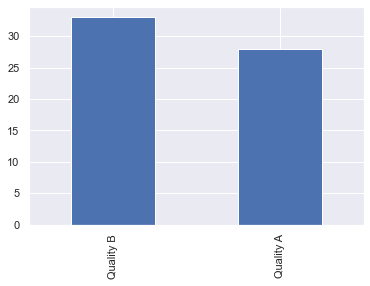

In [38]:
#check the data distribution of Qaulity variable
print(final_manufacture_data['Quality'].value_counts())
final_manufacture_data['Quality'].value_counts().plot(kind='bar')

- The Quality column data null value imputed based on the clustering. 
- "Quality A" have 28 data points and "Quality B" have 33 data points.